# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid=990de16d3c231a40b7d83cb7db271200"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        response = requests.get(city_url)
        city_weather = response.json()

      # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"] - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(city_weather["dt"]))

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | ziway
Processing Record 6 of Set 1 | labrador city
Processing Record 7 of Set 1 | ola
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | manistee
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | akrehamn
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | lerwick
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | katsuren-haebaru
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | arkhangel'sk
Processing Record 19 of Set 1 | tubarjal
Processing Record 20 of Set 1 | saint-pierre
Processing Record 21 of Set 1 | vilhena
Processing Record 22 of Set 1 | kayangel
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,13.82,65,48,3.14,AU,2024-07-26 19:29:48
1,grytviken,-54.2811,-36.5092,-0.27,96,100,1.20,GS,2024-07-26 19:29:48
2,kodiak,57.7900,-152.4072,12.73,100,100,1.54,US,2024-07-26 19:29:48
3,whitehorse,60.7161,-135.0538,16.08,67,20,6.71,CA,2024-07-26 19:29:48
4,ziway,7.9333,38.7167,20.12,79,100,4.76,ET,2024-07-26 19:29:48


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,13.82,65,48,3.14,AU,2024-07-26 19:29:48
1,grytviken,-54.2811,-36.5092,-0.27,96,100,1.20,GS,2024-07-26 19:29:48
2,kodiak,57.7900,-152.4072,12.73,100,100,1.54,US,2024-07-26 19:29:48
3,whitehorse,60.7161,-135.0538,16.08,67,20,6.71,CA,2024-07-26 19:29:48
4,ziway,7.9333,38.7167,20.12,79,100,4.76,ET,2024-07-26 19:29:48


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

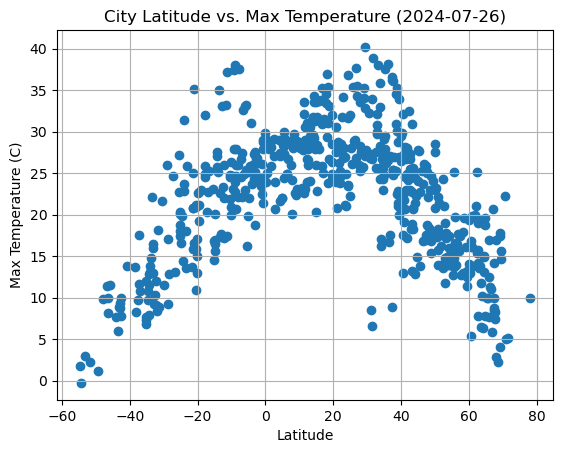

In [35]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-07-26)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

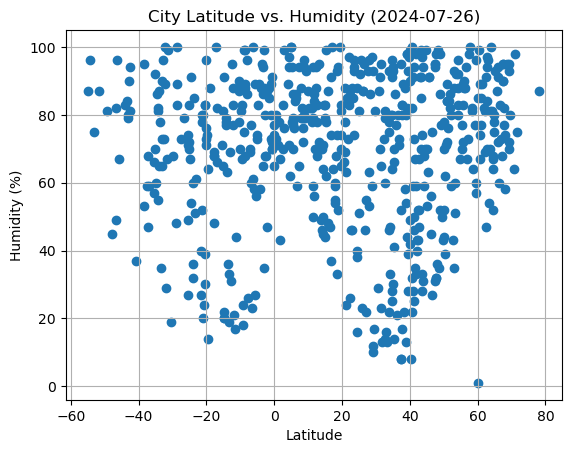

In [36]:
# Build scatter plot for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-07-26)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

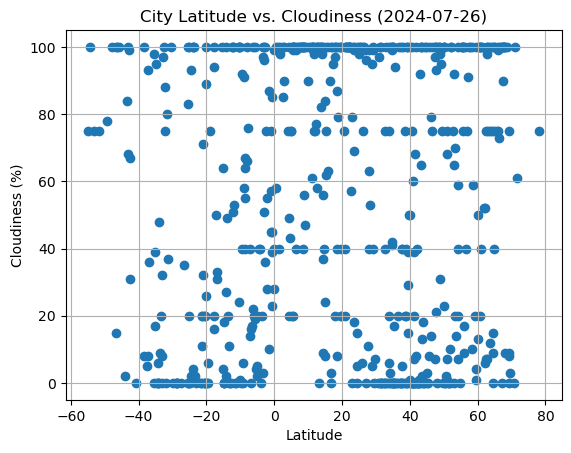

In [37]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-07-26)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

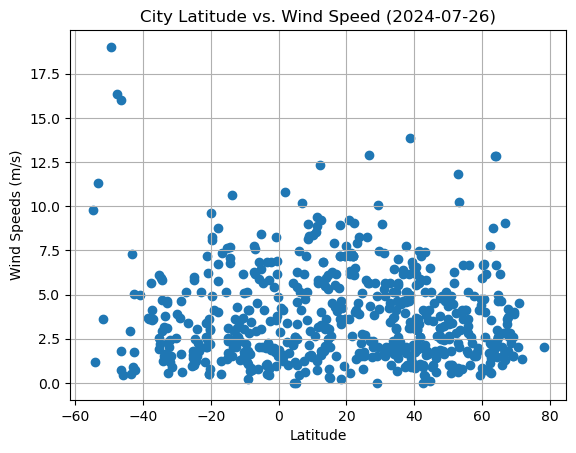

In [38]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-07-26)")
plt.ylabel("Wind Speeds (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x, y):
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x, y)
    pe_fit = pe_slope * x + pe_int
    
    plt.scatter(x, y)
    plt.plot(x, pe_fit, "--")
    plt.xlabel('Latitude')
    
    print(f'r = {pe_r:.2f}')
    
    eqn = f'y = {pe_slope:.2f}x + {pe_int:.2f}'
    plt.text(0.05, 0.9, eqn, transform=plt.gca().transAxes, ha='left', va='top')

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kodiak,57.7900,-152.4072,12.73,100,100,1.54,US,2024-07-26 19:29:48
3,whitehorse,60.7161,-135.0538,16.08,67,20,6.71,CA,2024-07-26 19:29:48
4,ziway,7.9333,38.7167,20.12,79,100,4.76,ET,2024-07-26 19:29:48
5,labrador city,52.9463,-66.9114,18.99,35,0,2.24,CA,2024-07-26 19:29:48
6,ola,59.5833,151.2833,11.43,60,4,4.77,RU,2024-07-26 19:29:48


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,13.82,65,48,3.14,AU,2024-07-26 19:29:48
1,grytviken,-54.2811,-36.5092,-0.27,96,100,1.20,GS,2024-07-26 19:29:48
8,port-aux-francais,-49.3500,70.2167,1.18,81,78,19.01,TF,2024-07-26 19:29:48
10,waitangi,-43.9535,-176.5597,7.68,83,2,2.96,NZ,2024-07-26 19:29:49
12,puerto natales,-51.7236,-72.4875,2.25,87,75,3.60,CL,2024-07-26 19:29:49


###  Temperature vs. Latitude Linear Regression Plot

r = -0.67


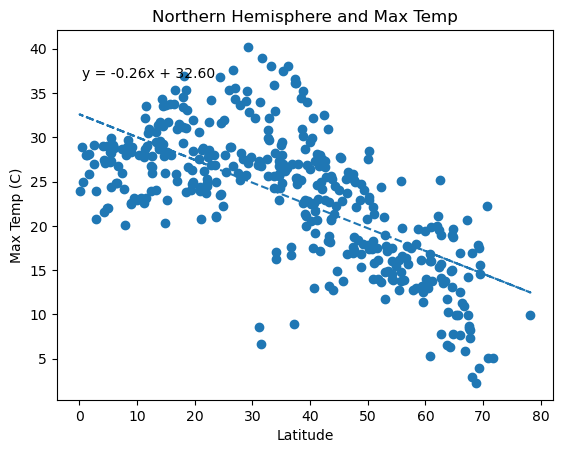

In [52]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.title('Northern Hemisphere and Max Temp')
plt.ylabel('Max Temp (C)')
plt.show()

r = 0.79


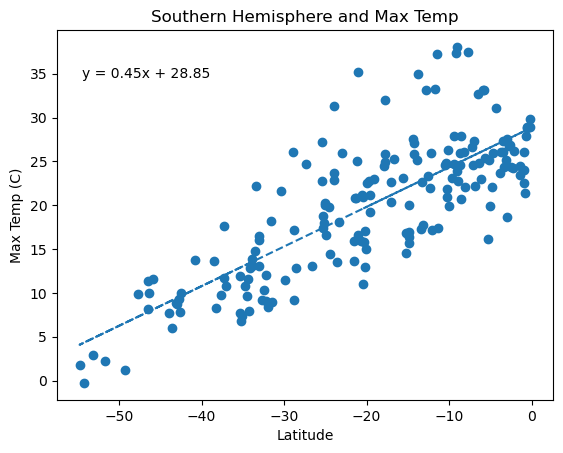

In [53]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.title('Southern Hemisphere and Max Temp')
plt.ylabel('Max Temp (C)')
plt.show()

**Discussion about the linear relationship:** There are very strong and opposing relationships between hemispheres and temperature. For northern hemisphere cities, as latitude increases, max temperature appears to fall. For southern hemispheres, as latitude increases, max temperature actually increases. It should be of note that the relationship for southern hemisphere and max temp appears to have a much better fit to the regression line than the northern hemisphere relationship.

### Humidity vs. Latitude Linear Regression Plot

r = 0.02


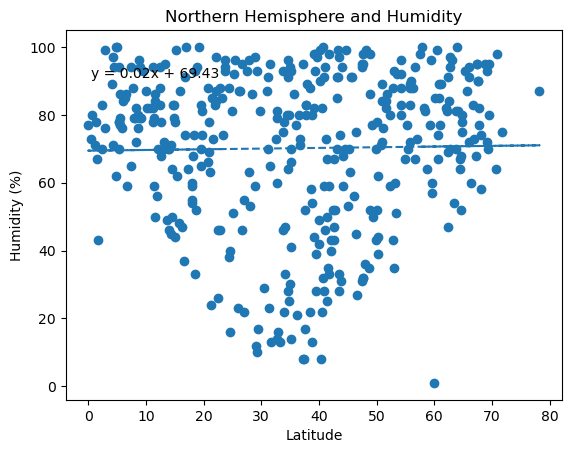

In [54]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.title('Northern Hemisphere and Humidity')
plt.ylabel('Humidity (%)')
plt.show()

r = -0.04


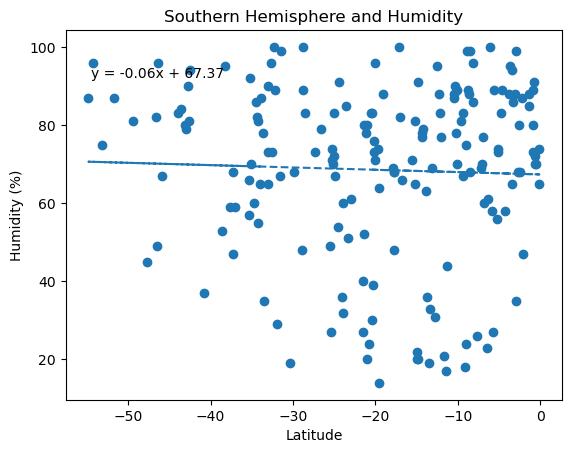

In [55]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.title('Southern Hemisphere and Humidity')
plt.ylabel('Humidity (%)')
plt.show()

**Discussion about the linear relationship:** I thought these relationships were rather strange. Both northern and southern hemisphere analyses against humidity yieled a similar regression line but the overall distribution of the data is much varied. The distribution is tighter for the northern hemisphere and looser for the southern hemisphere. There is also wider distribution of low humidity percentages at "higher" southern hemisphere latitudes included in the data set whereas in the norther hemispere, at higher latitudes there was only one data point at a lower humidity percentage. 

### Cloudiness vs. Latitude Linear Regression Plot

r = -0.20


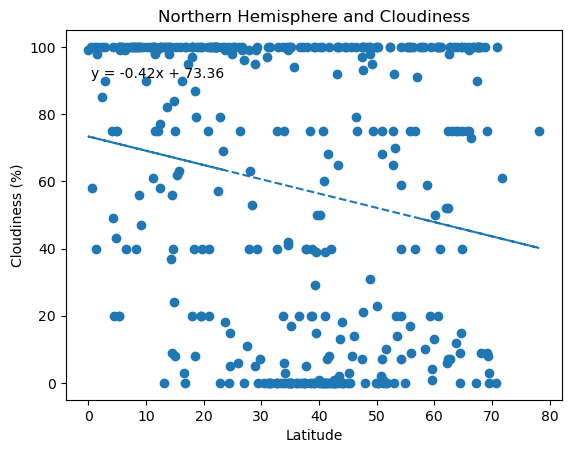

In [56]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.title('Northern Hemisphere and Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.show()

r = -0.06


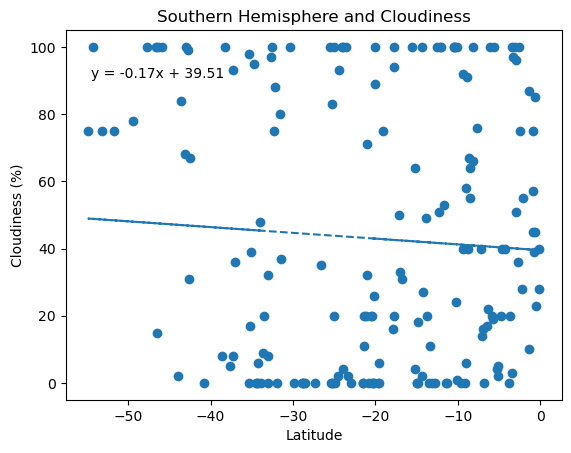

In [57]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.title('Southern Hemisphere and Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.show()

**Discussion about the linear relationship:** In terms of cloudiness, The overall median area in which the linear regression line was generated was at a lower temp for southern than northern hemisphere city-location-based data sets. This was between the 70 and 60 marks for northern hemisphere and around a consistent 40 mark for southern hemisphere. The distribution appears overall visually similar however.

### Wind Speed vs. Latitude Linear Regression Plot

r = -0.14


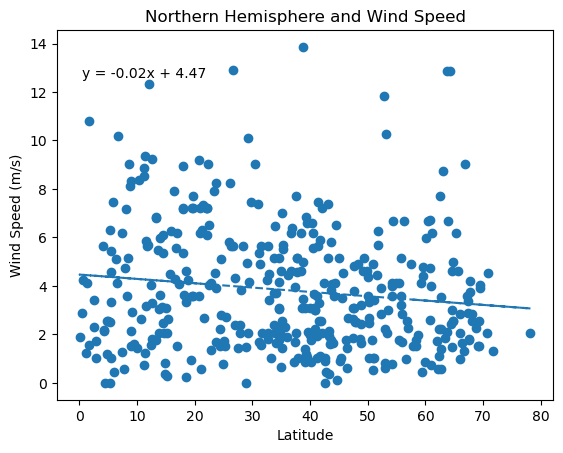

In [58]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.title('Northern Hemisphere and Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.show()

r = -0.12


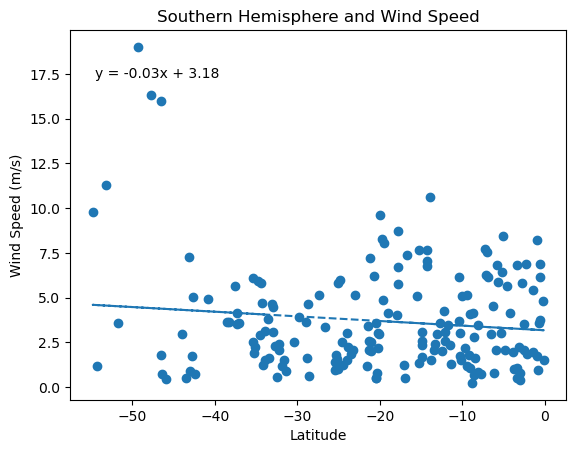

In [59]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.title('Southern Hemisphere and Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.show()

**Discussion about the linear relationship:** Northern and Southern Hemispheres appear to share the same relationships for wind speed. As latitude increases, wind speed appears to overall trend downwards, maybe slightly steeper decrease than northern. Both northern and southern hemispheres also features primarily all lower windspeeds, basically 10 m/s and lower. Southern hemisphere data appears lower than northern hemisphere data but note that that scale is actually higher for southern than lower, due to the few outlier cities that were featuring higher average wind speeds.